<a href="https://colab.research.google.com/github/leonlahoud/py-notebooks-test/blob/main/xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data for XOR function
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# Seed for reproducibility
np.random.seed(42)

# Initialize weights randomly with mean 0
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Learning rate
learning_rate = 0.1
epochs = 10000

# Training the neural network
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = outputs - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Testing the neural network
hidden_layer_input = np.dot(inputs, hidden_weights) + hidden_bias
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
predicted_output = sigmoid(output_layer_input)

print("Predicted Output:")
print(predicted_output)


Predicted Output:
[[0.05321718]
 [0.95171956]
 [0.95160871]
 [0.05174923]]


In [2]:
# Function to predict output for new input
def predict(input_data):
    hidden_layer_input = np.dot(input_data, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    return predicted_output

new_inputs = np.array([[1, 0], [0, 1]])
predictions = predict(new_inputs)

print("Predicted Output for [1, 0] and [0, 1]:")
print(predictions)

Predicted Output for [1, 0] and [0, 1]:
[[0.95160871]
 [0.95171956]]


In [3]:
new_inputs = np.array([ [0, 1]])
predictions = predict(new_inputs)

print("Predicted Output for [1, 0] and [0, 1]:")
print(predictions)

Predicted Output for [1, 0] and [0, 1]:
[[0.95171956]]


In [4]:
new_inputs = np.array([[1, 1]])
predictions = predict(new_inputs)

print("Predicted Output for [1, 0] and [0, 1]:")
print(predictions)

Predicted Output for [1, 0] and [0, 1]:
[[0.05174923]]


In [5]:
new_inputs = np.array([[0,0]])
predictions = predict(new_inputs)

print("Predicted Output for [1, 0] and [0, 1]:")
print(predictions)

Predicted Output for [1, 0] and [0, 1]:
[[0.05321718]]


In [6]:
pip install matplotlib


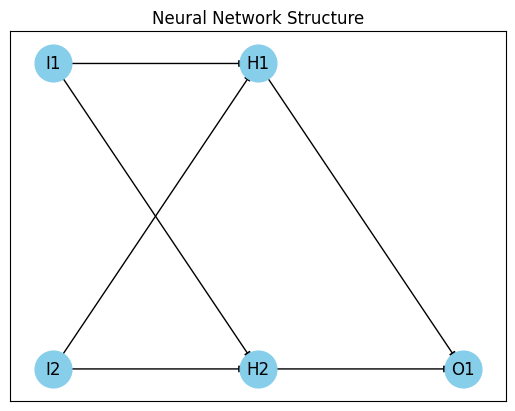

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(input_neurons, hidden_neurons, output_neurons):
    G = nx.DiGraph()

    # Create nodes for input layer
    for i in range(input_neurons):
        G.add_node(f"I{i+1}", pos=(0, input_neurons-i), layer="input")

    # Create nodes for hidden layer
    for h in range(hidden_neurons):
        G.add_node(f"H{h+1}", pos=(1, hidden_neurons-h), layer="hidden")

    # Create nodes for output layer
    for o in range(output_neurons):
        G.add_node(f"O{o+1}", pos=(2, output_neurons-o), layer="output")

    # Add edges from input to hidden layer
    for i in range(input_neurons):
        for h in range(hidden_neurons):
            G.add_edge(f"I{i+1}", f"H{h+1}")

    # Add edges from hidden to output layer
    for h in range(hidden_neurons):
        for o in range(output_neurons):
            G.add_edge(f"H{h+1}", f"O{o+1}")

    # Get positions for nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

    plt.title("Neural Network Structure")
    plt.show()

# Define the number of neurons in each layer
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Draw the neural network
draw_neural_network(input_neurons, hidden_neurons, output_neurons)
